First 5 rows:
              Name            Timestamp   Status Description  \
0  Conveyor Belt 4  2025-08-15 00:00:00  Running         NaN   
1  Conveyor Belt 4  2025-08-15 00:15:00  Running         NaN   
2  Conveyor Belt 4  2025-08-15 00:30:00  Running         NaN   
3  Conveyor Belt 4  2025-08-15 00:45:00  Running         NaN   
4  Conveyor Belt 4  2025-08-15 01:00:00  Running         NaN   

   Vibration Frequency  Vibration Amplitude  Bearing Temperature  \
0              1490.82                 0.04               77.130   
1              1498.37                 0.04               77.076   
2              1503.22                 0.06               77.307   
3              1508.11                 0.04               77.474   
4              1498.13                 0.06               77.785   

   Motor Temperature  Belt Load  Torque  Noise Levels  Current and Voltage  \
0             96.902       1.36  318.07         55.12                15.79   
1             96.975       1.07  295

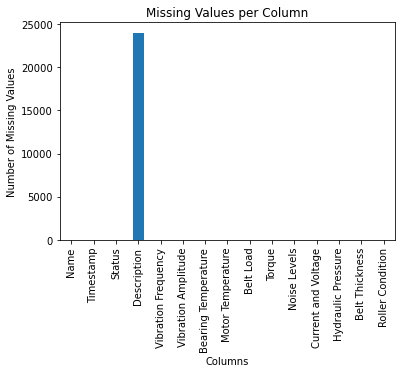

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'Belt 5 9 Months negative data.xlsx'  # Update with your actual file path if needed
df = pd.read_excel(file_path)

# Step 2: Quick overview of the data
print("First 5 rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Step 3: Check for missing values
missing = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing)

# Visualize missing values
missing.plot(kind='bar', title='Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()




In [94]:
if df['Name'].nunique() == 1:
    print("The 'name' column is constant and will be dropped.")
    df.drop('Name', axis=1, inplace=True)


The 'name' column is constant and will be dropped.


In [95]:
import pandas as pd

# Convert 'Timestamp' column to datetime, coercing errors into NaT
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Check for any invalid dates that were converted to NaT
invalid_dates = df[df['Timestamp'].isnull()]
print("Invalid dates found:\n", invalid_dates)

# Optionally, drop rows with invalid dates
df = df.dropna(subset=['Timestamp'])

# Extract components if needed
df['year'] = df['Timestamp'].dt.year
df['month'] = df['Timestamp'].dt.month
df['day'] = df['Timestamp'].dt.day
df['hour'] = df['Timestamp'].dt.hour
df['minute'] = df['Timestamp'].dt.minute
df['second'] = df['Timestamp'].dt.second

# Convert to a numeric timestamp if required
df['timestamp_numeric'] = df['Timestamp'].apply(lambda x: x.timestamp())

print(df.info())


Invalid dates found:
       Timestamp   Status Description  Vibration Frequency  \
19008       NaT  Running         NaN              1490.82   
19009       NaT  Running         NaN              1498.37   
19010       NaT  Running         NaN              1503.22   
19011       NaT  Running         NaN              1508.11   
19012       NaT  Running         NaN              1498.13   
...         ...      ...         ...                  ...   
19099       NaT  Running         NaN              1506.74   
19100       NaT  Running         NaN              1502.84   
19101       NaT  Running         NaN              1503.36   
19102       NaT  Running         NaN              1498.34   
19103       NaT  Running         NaN              1495.26   

       Vibration Amplitude  Bearing Temperature  Motor Temperature  Belt Load  \
19008                 0.04               77.130             96.902       1.36   
19009                 0.04               77.076             96.975       1.07   
19

In [96]:
nat_count = df['Timestamp'].isna().sum()
print("Number of NaT values in 'Timestamp':", nat_count)
df.head()


Number of NaT values in 'Timestamp': 0


,Timestamp,Status,Description,Vibration Frequency,Vibration Amplitude,Bearing Temperature,Motor Temperature,Belt Load,Torque,Noise Levels,...,Hydraulic Pressure,Belt Thickness,Roller Condition,year,month,day,hour,minute,second,timestamp_numeric
0,2025-08-15 00:00:00,Running,NaN,1490.82,0.04,77.130,96.902,1.36,318.07,55.12,...,382.09,1.58000,86.000,2025,8,15,0,0,0,1.755216e+09
1,2025-08-15 00:15:00,Running,NaN,1498.37,0.04,77.076,96.975,1.07,295.50,59.68,...,376.48,1.57950,85.854,2025,8,15,0,15,0,1.755217e+09
2,2025-08-15 00:30:00,Running,NaN,1503.22,0.06,77.307,96.755,1.21,314.38,58.20,...,384.20,1.57925,85.781,2025,8,15,0,30,0,1.755218e+09
3,2025-08-15 00:45:00,Running,NaN,1508.11,0.04,77.474,97.661,1.29,311.84,56.16,...,379.79,1.57900,85.708,2025,8,15,0,45,0,1.755219e+09
4,2025-08-15 01:00:00,Running,NaN,1498.13,0.06,77.785,97.471,1.07,317.14,55.39,...,383.95,1.57875,85.635,2025,8,15,1,0,0,1.755220e+09


In [97]:
# One-Hot Encode the Status column
df = pd.get_dummies(df, columns=['Status'], prefix='status')
# print(df.head())


In [98]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Drop non-numeric columns that are not needed for the model
df_model = df.drop(non_numeric_cols, axis=1)

# Alternatively, if you only want to keep numeric columns:
# df_model = df.select_dtypes(include=['number'])
df=df_model

print("Columns used for modeling:", df_model.columns)
df.head()


Non-numeric columns: Index(['Description'], dtype='object')
Columns used for modeling: Index(['Timestamp', 'Vibration Frequency', 'Vibration Amplitude',
       'Bearing Temperature', 'Motor Temperature', 'Belt Load', 'Torque',
       'Noise Levels', 'Current and Voltage', 'Hydraulic Pressure',
       'Belt Thickness', 'Roller Condition', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'timestamp_numeric', 'status_Down',
       'status_Maintenance', 'status_Running'],
      dtype='object')


,Timestamp,Vibration Frequency,Vibration Amplitude,Bearing Temperature,Motor Temperature,Belt Load,Torque,Noise Levels,Current and Voltage,Hydraulic Pressure,...,year,month,day,hour,minute,second,timestamp_numeric,status_Down,status_Maintenance,status_Running
0,2025-08-15 00:00:00,1490.82,0.04,77.130,96.902,1.36,318.07,55.12,15.79,382.09,...,2025,8,15,0,0,0,1.755216e+09,0,0,1
1,2025-08-15 00:15:00,1498.37,0.04,77.076,96.975,1.07,295.50,59.68,14.34,376.48,...,2025,8,15,0,15,0,1.755217e+09,0,0,1
2,2025-08-15 00:30:00,1503.22,0.06,77.307,96.755,1.21,314.38,58.20,15.03,384.20,...,2025,8,15,0,30,0,1.755218e+09,0,0,1
3,2025-08-15 00:45:00,1508.11,0.04,77.474,97.661,1.29,311.84,56.16,15.43,379.79,...,2025,8,15,0,45,0,1.755219e+09,0,0,1
4,2025-08-15 01:00:00,1498.13,0.06,77.785,97.471,1.07,317.14,55.39,14.35,383.95,...,2025,8,15,1,0,0,1.755220e+09,0,0,1


In [102]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error
import joblib

# -------------------------------
# 2. Classification: Predict Downtime Occurrence
# -------------------------------
# Define features by dropping target and identifier columns
features_class = df.drop(['Timestamp', 'timestamp_numeric', 'status_Down', 'status_Maintenance', 'status_Running'], axis=1).columns
X_class = df[features_class]
y_class = df['status_Down']

split_idx = int(0.8 * len(df))
X_class_train = X_class.iloc[:split_idx]
X_class_test = X_class.iloc[split_idx:]
y_class_train = y_class.iloc[:split_idx]
y_class_test = y_class.iloc[split_idx:]

# Calculate scale_pos_weight (ratio of negatives to positives) for imbalance
positive_count = y_class_train.sum()
negative_count = len(y_class_train) - positive_count
scale_pos_weight = negative_count / positive_count

# Train the XGBClassifier
xgb_classifier = XGBClassifier(
    n_estimators=100,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,    # required for newer versions of xgboost
    eval_metric='logloss'       # set a suitable evaluation metric
)
xgb_classifier.fit(X_class_train, y_class_train)

# Evaluate classification performance
y_class_pred = xgb_classifier.predict(X_class_test)
accuracy = accuracy_score(y_class_test, y_class_pred)
print("Classification Accuracy for Downtime (XGBoost):", accuracy)

# Save the trained classifier for later use
joblib.dump(xgb_classifier, 'xgb_classifier.pkl')

# -------------------------------
# 3. Regression: Predict Downtime Timestamp (Numeric) using XGBoost
# -------------------------------
# For the regressor, focus on rows where downtime occurred
df_down = df[df['status_Down'] == 1].copy()

# Define regression features by dropping target and identifier columns
features_reg = df_down.drop(['Timestamp', 'timestamp_numeric', 'status_Down', 'status_Maintenance', 'status_Running'], axis=1).columns
X_reg = df_down[features_reg]
y_reg = df_down['timestamp_numeric']

# Chronological split for regression (80% training, 20% testing)
split_idx_reg = int(0.8 * len(df_down))
X_reg_train = X_reg.iloc[:split_idx_reg]
X_reg_test = X_reg.iloc[split_idx_reg:]
y_reg_train = y_reg.iloc[:split_idx_reg]
y_reg_test = y_reg.iloc[split_idx_reg:]

# Train the XGBRegressor
xgb_regressor = XGBRegressor(
    n_estimators=100,
    random_state=42
)
xgb_regressor.fit(X_reg_train, y_reg_train)

# Evaluate regression performance using Mean Absolute Error (MAE)
y_reg_pred = xgb_regressor.predict(X_reg_test)
mae_reg = mean_absolute_error(y_reg_test, y_reg_pred)
print("Regression MAE for Downtime Timestamp Prediction (XGBoost):", mae_reg)

# Convert numeric predictions back to datetime (assuming unit='s')
actual_datetimes = pd.to_datetime(y_reg_test.values, unit='s')
predicted_datetimes = pd.to_datetime(y_reg_pred, unit='s')

# Create a DataFrame comparing actual vs predicted downtime timestamps
comparison_df = pd.DataFrame({
    'Actual Downtime': actual_datetimes,
    'Predicted Downtime': predicted_datetimes
})
print("\nComparison of Actual vs Predicted Downtime Timestamps:")
print(comparison_df.head())

# Save the trained regressor for later use
joblib.dump(xgb_regressor, 'xgb_regressor.pkl')

C:\anaconda\lib\site-packages\xgboost\core.py:158: UserWarning: [14:46:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Accuracy for Downtime (XGBoost): 0.9977024698449167
Regression MAE for Downtime Timestamp Prediction (XGBoost): 1867426.7272727273

Comparison of Actual vs Predicted Downtime Timestamps:
      Actual Downtime  Predicted Downtime
0 2026-03-17 13:30:00 2026-03-17 13:00:48
1 2026-03-17 13:45:00 2026-03-17 12:50:08
2 2026-03-17 14:00:00 2026-03-17 12:52:16
3 2026-03-17 14:15:00 2026-03-17 12:54:24
4 2026-03-17 14:30:00 2026-03-17 12:56:32


['xgb_regressor.pkl']